### Lab Session 2: SLA 2018
    - Instructor: Prof. Varun Rai
    - TA: Vivek Khetan
    - 
    
### Data visualization

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import *

%matplotlib inline

import seaborn as sns
import plotly

#### Dataset and code highly influenced by a few kaggle example. 
 -  #### Goal: To explain so that you can do the same in other simillar studies 


#### nominal categories: 
    "pure" categories that don't make a lot of sense to order. Nominal categorical variables include things like countries,
    ZIP codes, types of cheese, and lunar landers. 

#### ordinal categories: 
    things that do make sense to compare, like earthquake magnitudes, housing complexes with certain numbers of apartments,
    and the sizes of bags of chips at your local deli.

In [59]:
reviews = pd.read_csv("winemag-data_first150k.csv", index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Bar charts and categorical data
    - categories to number
    - wine producing province: no of label of wines they are producing
    
    * df.plot.bar()
    * Good for nominal and small ordinal categorical data.

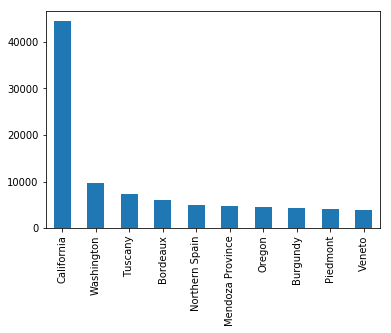

In [62]:
# PROVINCE IS NOMINAL 
reviews['province'].value_counts().head(10).plot.bar();


-  California produces far more wine than any other province of the world!
- But what percentage of the total is Californian vintage

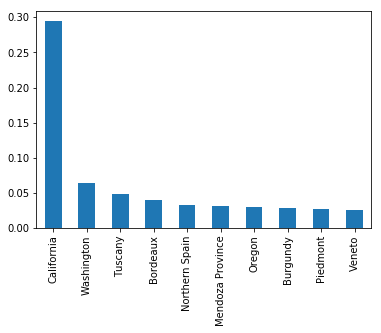

In [63]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar();


- California produces almost a third of wines reviewed in Wine Magazine!
- 

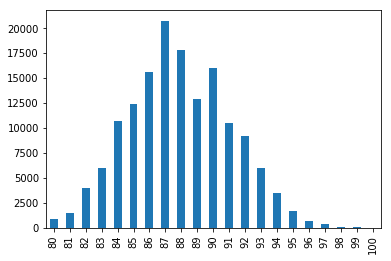

In [65]:
## POINTS : ORDINAL
reviews['points'].value_counts().sort_index().plot.bar();


- ALL are vintage wines; should have higher points
- seems like that, each wine has a score between 80 to 100


### Line charts and categorical data
    - categories to number: what if we have 100 different categories (bar-plot will be a mess)
    - wine producing province: no of label of wines they are producing
    - can pass over any number of many individual values
    - the tool of first choice for distributions with many unique values or categories
    - add an odred to horizontal-axis
    
    * df.plot.line()
    * Good for ordinal categorical and interval data.

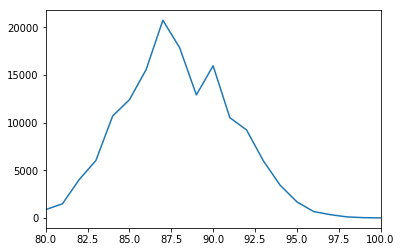

In [25]:
reviews['points'].value_counts().sort_index().plot.line()


#### Line chart is Default choice But:
    - Not appropriate for nominal categorical data. 
    - Bar charts distinguish between every "type" of point line charts mushes them together
    - Order on the x-axis doesn't make sense to some data
    - a descent form Ausitn to San-Antonio to Dallas doesn't make sense
* If your data can fit into a bar-chart; just use it

### Area charts
* Area charts are just line charts, but with the bottom shaded in
    - Main difference from line chart is just visual
    - Good for ordinal categorical and interval data.
    - df.plot.area()

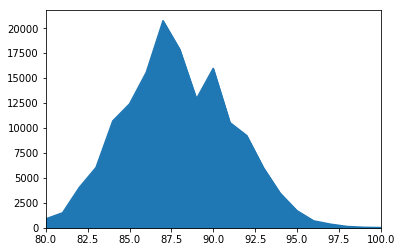

In [27]:
reviews['points'].value_counts().sort_index().plot.area()


### Histograms
##### Interval Data
    - goes beyond an ordinal categorical variable: it has a meaningful order,
    - can quantify the difference between two entries is itself as an interval variable
    - Intervals can be Quantitative and Qualitative:
        - tempreture of water: -20 and 120
        - qualitative: wine a seems like 82 on test a and 90 on test b:
            - any variable that has infinitely many possible values is definitely an interval variable 
            
- Line charts can also be used for interval data
- special kind of bar plot that splits your data into even intervals and displays how many rows are in each interval with bars

In [1]:
# reviews['price'] < 200

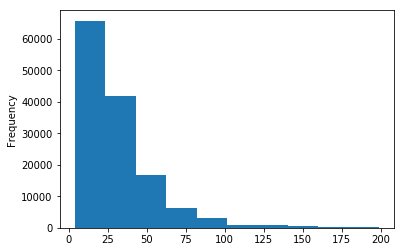

In [71]:
reviews[(reviews['price'] < 200)]['price'].plot.hist()


 difference from bar plot: instead of each bar representing a single value, it represents a range of values

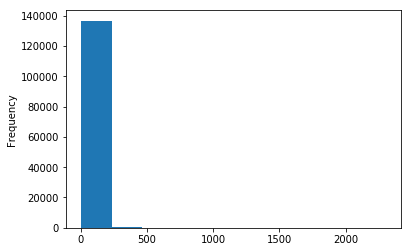

In [72]:
reviews['price'].plot.hist()


* Major shortcoming of Histogram: break space up into even intervals, they don't deal very well with skewed data

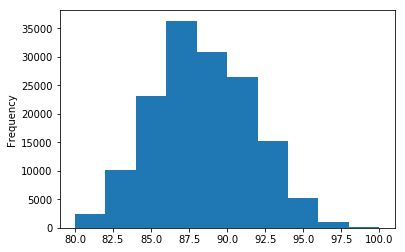

In [31]:
reviews['points'].plot.hist()


* Histograms work best for interval variables without skew 
* They also work really well for ordinal categorical variables like points

#### Exercise: bar, line/area, or histogram?
1. The volume of apples picked at an orchard based on the type of apple (Granny Smith, Fuji, etcetera).
2. The number of points won in all basketball games in a season.
3. The count of apartment buildings in Chicago by the number of individual units.

* Example number 1 is a nominal categorical example, and hence, a pretty straightfoward bar graph target.
* Example 2 is a large nominal categorical variable. A basketball game team can score between 50 and 150 points, too much for a bar chart; a line chart is a good way to go. A histogram could also work.
* Example 3 is an interval variable: a single building can have anywhere between 1 and 1000 or more apartment units. A line chart could work, but a histogram would probably work better! Note that this distribution is going to have a lot of skew (there is only a handful of very, very large apartment buildings).

#### To understand how variables interact with one another
    - If the way a value changes affect the another
    - can give us some idea of correaltion
    - 

#### Scatter Plot
- Good for interval and some nominal categorical data.
- df.plot.scatter()

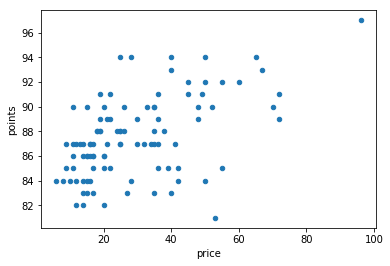

In [33]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

* downsample our data: do not effectively treat points which map to the same place

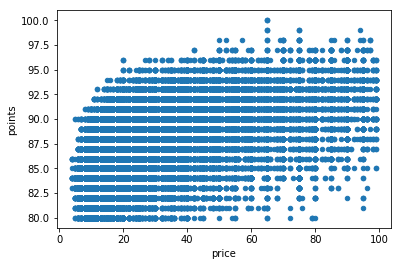

In [34]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')


### How to deal with this overmapping problem:
#### Hex Plot
*  aggregates points in space into hexagons, and then colorize those hexagons

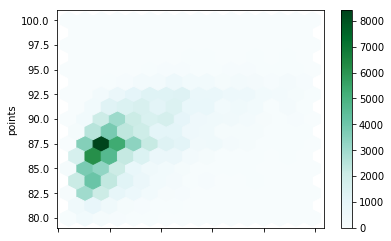

In [35]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)


- like scatter plot but tells a totally differnt story
- scatter Plot: when the variable can have a lot of unique value

#### Stacked Plot
    - Good for nominal and ordinal categorical data.
    - df.plot.bar(stacked=True)
    - plots the variables one on top of the other.

In [43]:
## say we have a dataset with wine counts of top five wines
wine_counts = pd.read_csv("wine_score.csv", index_col=0)
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


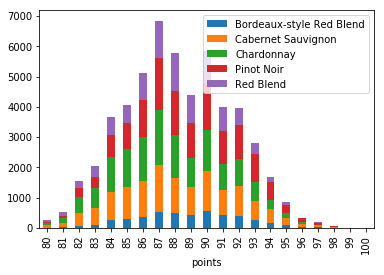

In [44]:
wine_counts.plot.bar(stacked=True)


- work best for nominal categorical or small ordinal categorical variables

### two major problems
* the second variable in a stacked plot must be a variable with a very limited number of possible values; 
can do by selecting a subset of interest group
* interpretability: can you tell which wine is the most common one to have gotten a score of approximately 87

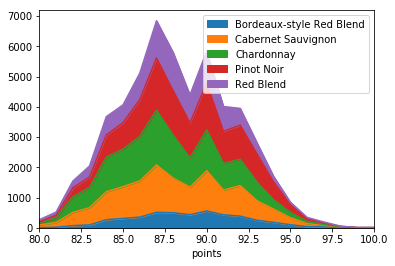

In [53]:
## Area cahrt
wine_counts.plot.area()


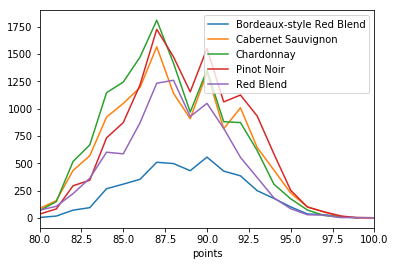

In [48]:
## Bivariate line chart
wine_counts.plot.line()
